# Problem Statement:
Car Data- Here, we will apply k-means clustering for grouping the similar cars in one cluster

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Cars Data file into Python DataFrame and view top 10 rows

In [2]:
cardata = pd.read_csv("/content/cars-+K+men (1).csv")

In [3]:
cardata.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


# Q2.  Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis

In [4]:
cardata.dtypes

mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car_name     object
dtype: object

In [5]:
cardata.shape

(398, 9)

In [6]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
cardata.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


# Q3. Check for missing value check, incorrect data and perform imputation with mean, median and mode as necessary

In [8]:
# Check for missing value
cardata.isna().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

In [9]:
# Na shows no missing value, but on careful data observation we could see "?" for hp values
cardata[cardata['hp']=="?"]

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [10]:
cardata['hp'].replace("?",np.nan, inplace=True)

In [11]:
# Now try to impute with mean of respective cylinders, but before this we must see the distribution for the variable
# We would drop na values and check distribution before taking call on whether imputation would be through mean, median 
import seaborn as sns
hp = cardata['hp'].dropna()
hp.count()

392

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


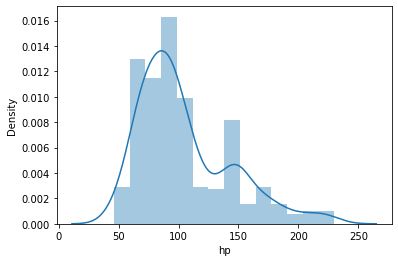

In [12]:
sns.distplot(pd.to_numeric(hp))

In [13]:
# Since this does not look to be normally distributed, let us impute by using median
cardata['hp'].fillna((cardata['hp'].median()), inplace=True)
cardata['hp'] = cardata['hp'].astype('float')

In [14]:
cardata.dtypes

mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin        int64
car_name     object
dtype: object

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences

In [15]:
cardata.corr(method='kendall')

,mpg,cyl,disp,hp,wt,acc,yr,origin
mpg,1.000000,-0.686477,-0.679847,-0.673377,-0.694006,0.301096,0.413661,0.467249
cyl,-0.686477,1.000000,0.794854,0.682006,0.735481,-0.367194,-0.273742,-0.551610
disp,-0.679847,0.794854,1.000000,0.711556,0.800508,-0.352110,-0.218920,-0.570074
hp,-0.673377,0.682006,0.711556,1.000000,0.696368,-0.482267,-0.274888,-0.402494
wt,-0.694006,0.735481,0.800508,0.696368,1.000000,-0.268619,-0.196863,-0.496185
acc,0.301096,-0.367194,-0.352110,-0.482267,-0.268619,1.000000,0.196024,0.173055
yr,0.413661,-0.273742,-0.218920,-0.274888,-0.196863,0.196024,1.000000,0.136967
origin,0.467249,-0.551610,-0.570074,-0.402494,-0.496185,0.173055,0.136967,1.000000


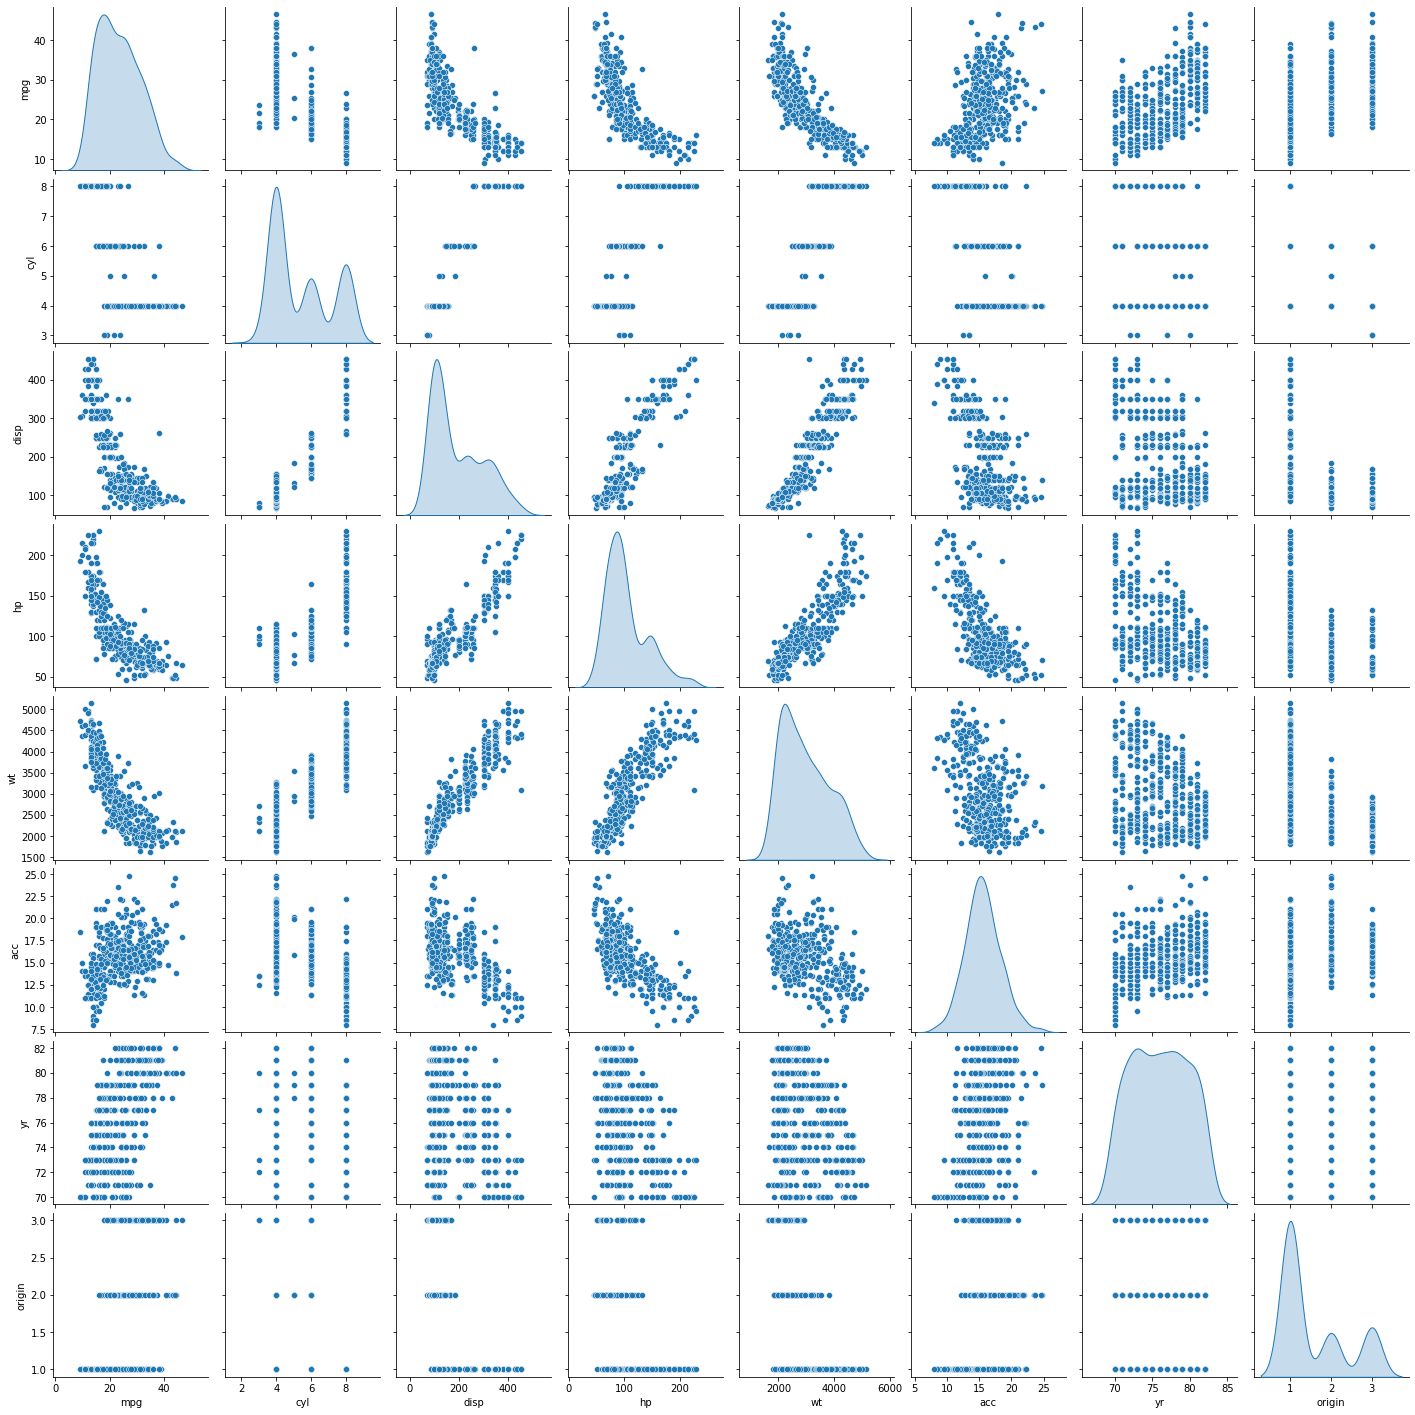

In [16]:
sns.pairplot(cardata,diag_kind='kde')

In [17]:
cardata.groupby(cardata['cyl']).mean()

,mpg,disp,hp,wt,acc,yr,origin
cyl,,,,,,,
3,20.550000,72.500000,99.250000,2398.500000,13.250000,75.500000,3.000000
4,29.286765,109.796569,78.654412,2308.127451,16.601471,77.073529,1.985294
5,27.366667,145.000000,82.333333,3103.333333,18.633333,79.000000,2.000000
6,19.985714,218.142857,101.410714,3198.226190,16.263095,75.928571,1.190476
8,14.963107,345.009709,158.300971,4114.718447,12.955340,73.902913,1.000000


# Q5. Perform any feature engineering/transformation and remove any duplicate or irrelevant columns

In [18]:
# Calculate age of vehicle
cardata['age'] = 83-cardata['yr']
cardata.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name,age
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,13
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,13
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,13
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,13
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,13


In [19]:
#Convert origing into dummy variables (This again is subjected to business knowledge. We might drop this variable as well
# Inclusion is more to demonstrate on how to use categorical data)

one_hot = pd.get_dummies(cardata['origin'])
one_hot = one_hot.add_prefix('origin_')

# merge in main data frame
cardata = cardata.join(one_hot)
cardata.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name,age,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,13,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,13,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,13,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,13,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,13,1,0,0


In [20]:
# Let us now remove duplicate/irrelevant columns

cars_new = cardata.drop(['yr','origin','car_name'], axis =1)

cars_new.head()

,mpg,cyl,disp,hp,wt,acc,age,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,13,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,13,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,13,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,13,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,13,1,0,0


# Q6. Create new data frame with standardize variables and imputation for any missing/outliers

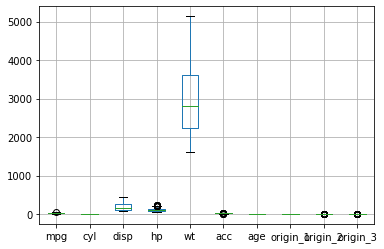

In [22]:
cars_new.boxplot()

{'boxes': [<matplotlib.lines.Line2D at 0x7fb35a75e610>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb35a763650>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb35a769690>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb35a769150>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb35a75eb90>,
  <matplotlib.lines.Line2D at 0x7fb35a763110>]}

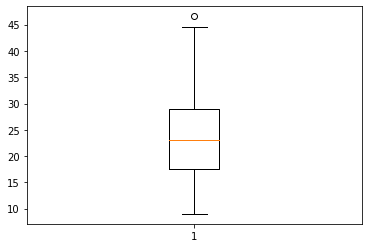

In [23]:
# We could see some outliers for mpg,hp and acc
plt.boxplot(cars_new['mpg'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29048b284e0>,
 'caps': [<matplotlib.lines.Line2D at 0x29048b28da0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29048b28390>],
 'medians': [<matplotlib.lines.Line2D at 0x29048b31630>],
 'fliers': [<matplotlib.lines.Line2D at 0x29048b31a58>],
 'means': []}

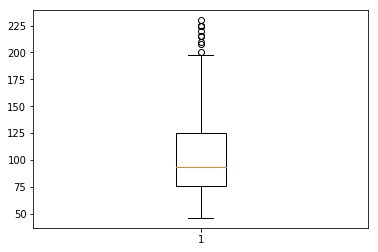

In [ ]:
plt.boxplot(cars_new['hp'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fb35a74aed0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb35a753f10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb35a75af50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb35a75aa10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb35a753490>,
  <matplotlib.lines.Line2D at 0x7fb35a7539d0>]}

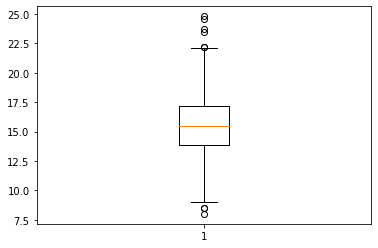

In [24]:
plt.boxplot(cars_new['acc'])

In [25]:
# Let us take logaritmic transform for hp,mpg and acc to remove outliers
cars_new['hp'] = np.log(cars_new['hp'])
cars_new['acc'] = np.log(cars_new['acc'])
cars_new['mpg'] = np.log(cars_new['mpg'])

cars_new.head()

,mpg,cyl,disp,hp,wt,acc,age,origin_1,origin_2,origin_3
0,2.890372,8,307.0,4.867534,3504,2.484907,13,1,0,0
1,2.708050,8,350.0,5.105945,3693,2.442347,13,1,0,0
2,2.890372,8,318.0,5.010635,3436,2.397895,13,1,0,0
3,2.772589,8,304.0,5.010635,3433,2.484907,13,1,0,0
4,2.833213,8,302.0,4.941642,3449,2.351375,13,1,0,0


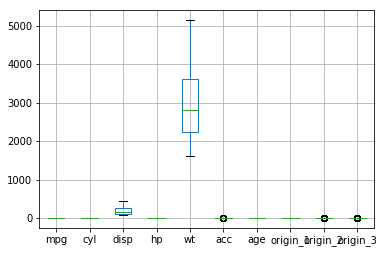

In [ ]:
cars_new.boxplot()

In [28]:

from scipy.stats import zscore

cars_new.dtypes
numeric_cols = cars_new.select_dtypes(include=[np.int64, np.float64]).columns
numeric_cols
cars_new[numeric_cols] =cars_new[numeric_cols].apply(zscore)


In [29]:
cars_new.head()

,mpg,cyl,disp,hp,wt,acc,age,origin_1,origin_2,origin_3
0,-0.622035,1.498191,1.090604,0.823608,0.630870,-1.353748,1.627426,1,0,0
1,-1.159493,1.498191,1.503514,1.523992,0.854333,-1.589535,1.627426,1,0,0
2,-0.622035,1.498191,1.196232,1.243998,0.550470,-1.835805,1.627426,1,0,0
3,-0.969242,1.498191,1.061796,1.243998,0.546923,-1.353748,1.627426,1,0,0
4,-0.790530,1.498191,1.042591,1.041316,0.565841,-2.093533,1.627426,1,0,0


# Q7. Create appropriate clusters with the new data set

In [30]:
# Variables are mow scaled. Let us now try to create clusters

cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(cars_new)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,3000.226131
1,2,1435.661694
2,3,1072.434353
3,4,873.977856
4,5,787.048065
5,6,722.110337
6,7,671.366830
7,8,635.207203
8,9,592.523192
9,10,561.765897


# Q8. Identify the appropriate clusters with result from above question

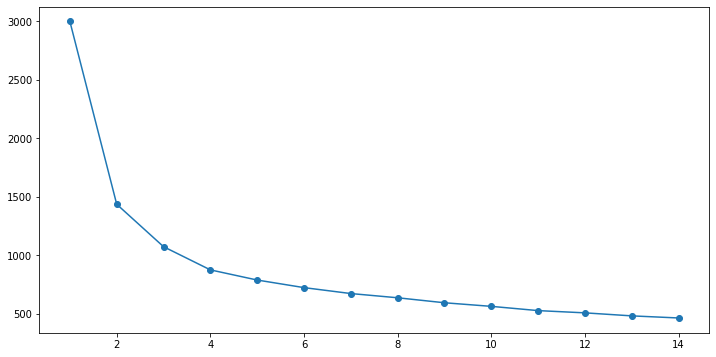

In [31]:
from matplotlib import cm

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [32]:


kmeans = KMeans(n_clusters=4, n_init = 5, random_state=12345)
kmeans.fit(cars_new)

KMeans(n_clusters=4, n_init=5, random_state=12345)

# Q9. Check for no of values in each cluster and centers for each variables

In [33]:


labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[ 94 117  96  91]


In [34]:

centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(cars_new) )
centroid_df.transpose()

,0,1,2,3
mpg,-1.306300e+00,1.080530,0.337373,-0.395798
cyl,1.498191e+00,-0.821104,-0.868584,0.424430
disp,1.503923e+00,-0.773034,-0.824059,0.309735
hp,1.442656e+00,-0.799132,-0.545073,0.112262
wt,1.404098e+00,-0.748370,-0.770282,0.324409
acc,-1.150226e+00,0.426220,0.308195,0.315020
age,6.883238e-01,-1.087358,0.657116,-0.006206
origin_1,1.000000e+00,0.410256,0.250000,0.912088
origin_2,-2.498002e-16,0.188034,0.468750,0.032967
origin_3,8.326673e-17,0.401709,0.281250,0.054945


# Q10. Assign the groups created above to data frame and study the characteristics for each group.

In [35]:
# Add cluster number to original cars data

predictions = kmeans.predict(cars_new)
predictions
cardata["group"] = predictions
cardata['group'] = cardata['group'].astype('category')
cardata.dtypes

mpg          float64
cyl            int64
disp         float64
hp           float64
wt             int64
acc          float64
yr             int64
origin         int64
car_name      object
age            int64
origin_1       uint8
origin_2       uint8
origin_3       uint8
group       category
dtype: object

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb357e7bd10>,
      dtype=object)

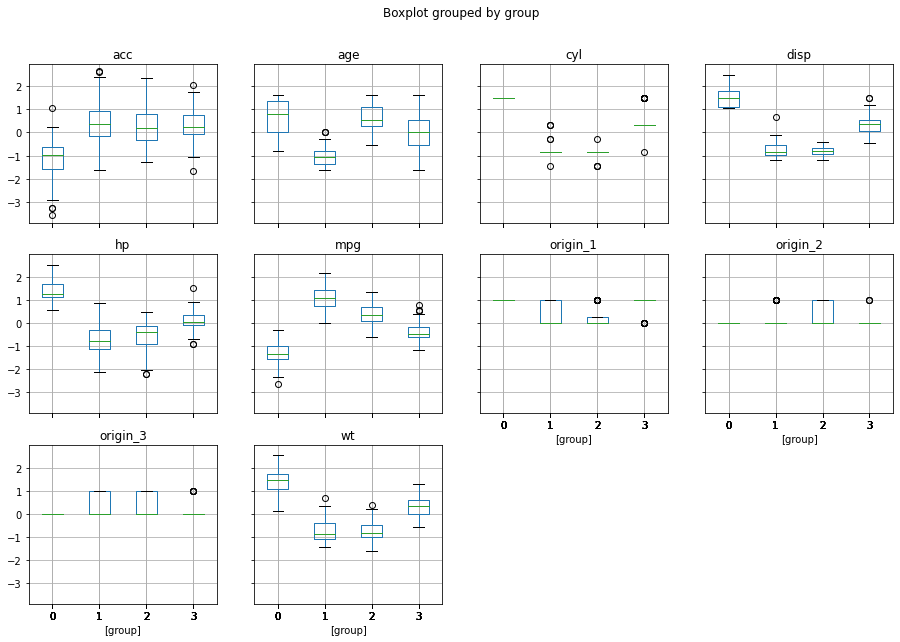

In [36]:
# Visualize the centers

cars_new["group"] = predictions
cars_new.boxplot(by = 'group',  layout=(3,4), figsize=(15, 10))

In [37]:
# Export the data into csv for any further analysis

from pandas import ExcelWriter
writer = ExcelWriter('d:\groups.xls')
cardata.to_excel(writer,'Sheet1')
writer.save()